In [18]:
import pandas as pd
pokemon = pd.read_csv('pokemon.csv')
combats = pd.read_csv('combats.csv')
test = pd.read_csv('tests.csv')

In [15]:
pokemon.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [19]:
pokemon['Type 2']=pokemon['Type 2'].fillna('None')

In [10]:
combats.head(5)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [12]:
test.head(5)

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


In [13]:
pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [20]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [24]:
print(pokemon[pokemon['Name'].isnull()])

     # Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
62  63  NaN  Fighting   None  65     105       60       60       70     95   

    Generation  Legendary  
62           1      False  


In [34]:
pokemon['Name']=pokemon['Name'].fillna('Poliwarth')

In [35]:
pokemon[pokemon['Name'].duplicated(keep=False)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [39]:
import seaborn as sns
pvt=pokemon.pivot(index='Name',columns='Type 1')

In [41]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [42]:
pokemon['Total']=pokemon['HP']+pokemon['Attack']+pokemon['Defense']+pokemon['Sp. Atk']+pokemon['Sp. Def']+pokemon['Speed']

In [43]:
pokemon.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,False,309


In [53]:
print(combats.loc[combats['First_pokemon']==2 and combats['Second_pokemon']==5].all())

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

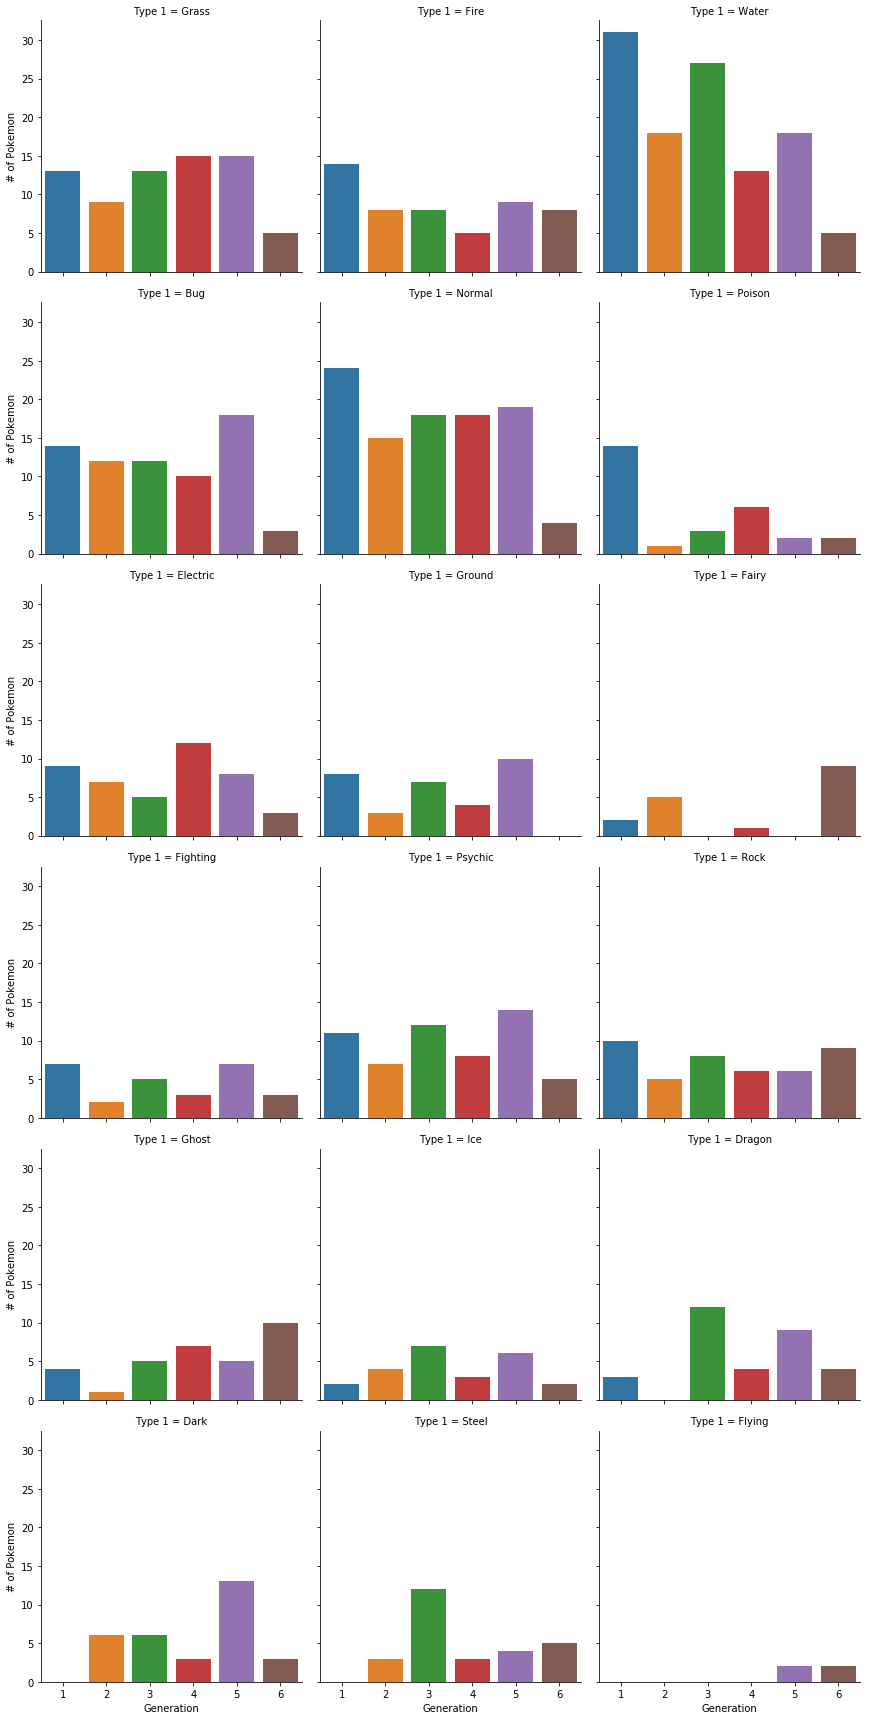

In [56]:
sns.factorplot(
    x='Generation',
    data=pokemon,
    col='Type 1',
    kind='count',
    col_wrap=3
).set_axis_labels('Generation', '# of Pokemon');

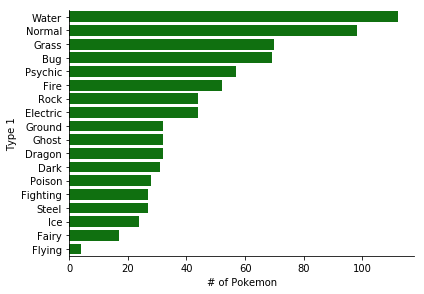

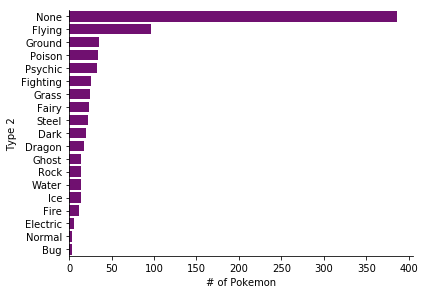

In [59]:
sns.factorplot(
    y='Type 1',
    data=pokemon,
    kind='count',
    order=pokemon['Type 1'].value_counts().index,
    aspect=1.5,
    color='green'
).set_axis_labels('# of Pokemon', 'Type 1')

sns.factorplot(
    y='Type 2',
    data=pokemon,
    kind='count',
    order=pokemon['Type 2'].value_counts().index,
    aspect=1.5,
    color='purple'
).set_axis_labels('# of Pokemon', 'Type 2');

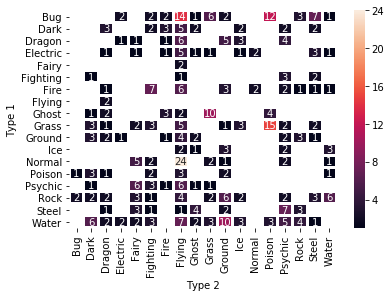

In [68]:
dual_types = pokemon[pokemon['Type 2'] != 'None']

sns.heatmap(
    dual_types.groupby(['Type 1', 'Type 2']).size().unstack(),
    linewidths=2,
    annot=True
);

In [69]:
pokemon.sort_values('Total', ascending=False).head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
426,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
164,165,Mega Mewtwo Y,Psychic,None,106,150,70,194,120,140,1,True,780
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
422,423,Primal Kyogre,Water,None,100,150,90,180,160,90,3,True,770
424,425,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770
552,553,Arceus,Normal,None,120,120,120,120,120,120,4,True,720
712,713,Kyurem White Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True,700
711,712,Kyurem Black Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True,700
409,410,Mega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False,700
413,414,Mega Metagross,Steel,Psychic,80,145,150,105,110,110,3,False,700


In [92]:
std_stats = pokemon.loc[:, ['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
          'Total']]

In [93]:
stats=std_stats.drop('Total', axis='columns').set_index('#').apply(
    lambda x: (x - x.mean()) / x.std())

In [94]:
stats['Strength']=stats.sum(axis='columns')

In [95]:
stats.head(5)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Strength
#,,,,,,,
1,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-3.959031
2,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.008538
3,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,3.050370
4,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,6.278674
5,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-4.297575


In [96]:
pokemon['Strength']=stats['Strength']

In [101]:
pokemon2=pokemon

In [126]:
columns_drop=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Strength','Total']
pokemon2=pokemon2.drop(columns_drop,axis='columns').set_index('#')


ValueError: labels ['HP' 'Attack' 'Defense' 'Sp. Atk' 'Sp. Def' 'Speed' 'Strength' 'Total'] not contained in axis

In [127]:
pokemon2.head(2)

,Name,Type 1,Type 2,Generation,Legendary
#,,,,,
1,Bulbasaur,Grass,Poison,1,False
2,Ivysaur,Grass,Poison,1,False


In [128]:
pokemon2.reset_index(inplace=True)

In [129]:
stats.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

In [134]:
pokemon=pd.merge(
    pokemon2,
    stats,
    on='#'
)

In [136]:
pokemon.sort_values('Strength', ascending=False).head(10)

,#,Name,Type 1,Type 2,Generation,Legendary,level_0,index,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Strength
164,165,Mega Mewtwo Y,Psychic,None,1,True,164,164,1.438877,2.187446,-0.123222,3.703286,1.728328,2.468043,11.402758
163,164,Mega Mewtwo X,Psychic,Fighting,1,True,163,163,1.438877,3.419832,0.838825,2.480877,1.009651,2.123933,11.311996
426,427,Mega Rayquaza,Dragon,Flying,3,True,426,426,1.399715,3.111736,0.838825,3.275443,1.009651,1.607768,11.243138
422,423,Primal Kyogre,Water,None,3,True,422,422,1.203902,2.187446,0.518143,3.275443,3.165682,0.747493,11.098109
424,425,Primal Groudon,Ground,Fire,3,True,424,424,1.203902,3.111736,2.762919,2.358637,0.650313,0.747493,10.835000
552,553,Arceus,Normal,None,4,True,552,552,1.987151,1.263157,1.480190,1.441830,1.728328,1.779823,9.680480
712,713,Kyurem White Kyurem,Dragon,Ice,5,True,712,712,2.182963,1.263157,0.518143,2.969841,1.009651,0.919548,8.863303
418,419,Mega Latias,Dragon,Psychic,3,True,418,418,0.420654,0.646964,1.480190,2.053035,2.806344,1.435713,8.842899
711,712,Kyurem Black Kyurem,Dragon,Ice,5,True,711,711,2.182963,2.803639,0.838825,1.441830,0.650313,0.919548,8.837119
268,269,Mega Tyranitar,Rock,Dark,2,False,268,268,1.203902,2.618782,2.442237,0.677825,1.728328,0.093684,8.764758
